# Generating the 2D density profile of LMC disk

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from matplotlib.colors import LogNorm
import matplotlib as mpl

In [2]:
mpl.rcParams['axes.labelsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 'xx-large'
mpl.rcParams['ytick.labelsize'] = 'xx-large'

## Reading the phase space of isolated LMC disk

In [3]:
iso_phase = Table.read('./data/LMC_iso_rotated_phase_space.fits')
iso_pos = iso_phase['u', 'v', 'w']

## Positions of the stellar particles

In [4]:
x, y, z = iso_pos['u'], iso_pos['v'], iso_pos['w']

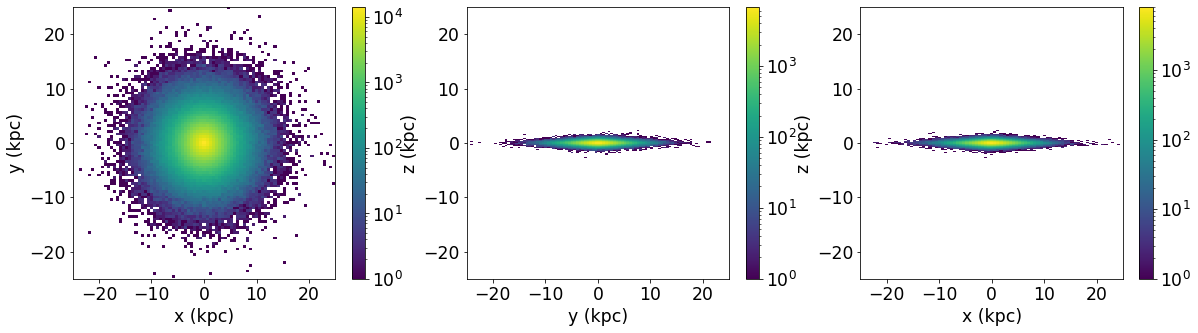

In [5]:
fig = plt.figure(figsize = (20,5))

ax1 = plt.subplot(1,3,1)
h1, xedg1, yedg1, im1 = ax1.hist2d(x, y, bins = 100, norm = LogNorm(), rasterized = True)
ax1.set_xlabel('x (kpc)')
ax1.set_ylabel('y (kpc)')
ax1.set_xlim(-25, 25)
ax1.set_ylim(-25, 25)
fig.colorbar(mappable = im1, ax = ax1)

ax2 = plt.subplot(1,3,2)
h2, xedg2, yedg2, im2 = ax2.hist2d(y, z, bins = 100, norm = LogNorm(), rasterized = True)
ax2.set_xlabel('y (kpc)')
ax2.set_ylabel('z (kpc)')
ax2.set_xlim(-25, 25)
ax2.set_ylim(-25, 25)
fig.colorbar(mappable = im2, ax = ax2)

ax3 = plt.subplot(1,3,3)
h3, xedg3, yedg3, im3 = ax3.hist2d(x, z, bins = 100, norm = LogNorm(), rasterized = True)
ax3.set_xlabel('x (kpc)')
ax3.set_ylabel('z (kpc)')
ax3.set_xlim(-25, 25)
ax3.set_ylim(-25, 25)
fig.colorbar(mappable = im3, ax = ax3)

plt.savefig('./figures/b12_stellar_density_map.pdf', bbox_inches = 'tight')

plt.show()

## Creating a strip

We extract stars residing in a volume between $x = -4.5$ kpc and $x = 4.5$ kpc, $y = -0.5$ kpc and $y = 0.5$ kpc, $z = -1$ kpc and $z = 1$ kpc 

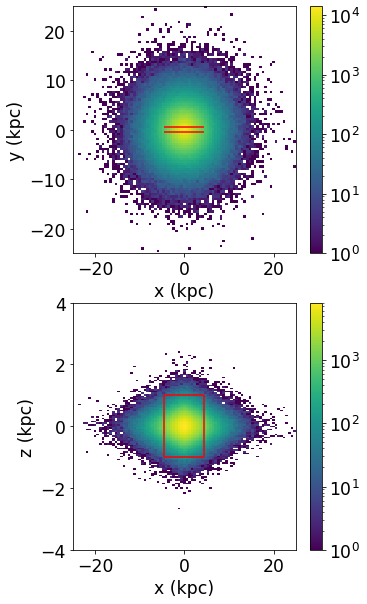

In [6]:
x_low = -4.5
x_high = 4.5
y_low = -0.5
y_high = 0.5
z_low = -1.
z_high = 1

fig = plt.figure(figsize = (5,10))

ax1 = plt.subplot(2,1,1)
h1, xedg1, yedg1, im1 = ax1.hist2d(x, y, bins = 100, norm = LogNorm(), rasterized = True)
ax1.hlines([y_low, y_high], x_low, x_high, color = 'red')
ax1.set_xlabel('x (kpc)')
ax1.set_ylabel('y (kpc)')
ax1.set_xlim(-25, 25)
ax1.set_ylim(-25, 25)
fig.colorbar(mappable = im1, ax = ax1)

ax2 = plt.subplot(2,1,2)
h2, xedg2, yedg2, im2 = ax2.hist2d(x, z, bins = 100, norm = LogNorm(), rasterized = True)
ax2.hlines([z_low, z_high], x_low, x_high, color = 'red')
ax2.vlines([x_low, x_high], z_low, z_high, color = 'red')
ax2.set_xlabel('x (kpc)')
ax2.set_ylabel('z (kpc)')
ax2.set_xlim(-25, 25)
ax2.set_ylim(-4, 4)
fig.colorbar(mappable = im2, ax = ax2)

plt.savefig('./figures/strip.pdf', bbox_inches = 'tight')

plt.show()

In [7]:
strip = iso_pos[np.logical_and(np.logical_and(np.logical_and(iso_pos['u'] >= x_low, iso_pos['u'] <= x_high), 
                              np.logical_and(iso_pos['v'] >= y_low, iso_pos['v'] <= y_high))
                               , np.logical_and(iso_pos['w'] >= z_low, iso_pos['w'] <= z_high))]
x1, y1, z1 = strip['u'], strip['v'], strip['w']

len(strip)

165641

## Creating $x$ and $z$ bins

In [8]:
x_binsize = 0.5 #x binsize in kpc
num_x_bins = int((x_high - x_low)/x_binsize)
x_bins = np.linspace(x_low, x_high, num_x_bins + 1)

In [9]:
z_binsize = 0.1 #z binsize in kpc
num_z_bins = int((z_high - z_low)/z_binsize)
z_bins = np.linspace(z_low, z_high, num_z_bins + 1)

## Binning the stellar particles

In [10]:
N, xedges, zedges = np.histogram2d(x1, z1, bins = [x_bins, z_bins]) 

## Calculating density

The radial density profile is given by:
$$\rho(x, z) = \frac{N(x, z) M_\ast}{\Delta V},$$
where $M_\ast = 2500 \: M_\odot$ is the mass of a star particle.

In [11]:
Mstar = 2500 # mass of a star particle in M_solar
vol = x_binsize*(y_high - y_low)*(z_binsize) # in kpc^3
density = N*Mstar/vol # in M_solar/kpc^3

For computing the error in $N$, we assume the counts follow Poisson statistics. Thus, the error in density will be:
$$\delta \rho(x, z) = \frac{\sqrt{<N(x, z)>} M_\ast}{\Delta V} $$

In [12]:
e_density = np.sqrt(N)*Mstar/vol

## Saving data

In [13]:
xmid = (xedges[1:] + xedges[:-1])/2
zmid = (zedges[1:] + zedges[:-1])/2

In [14]:
np.save('./data/x_vals', xmid)
np.save('./data/z_vals', zmid)
np.save('./data/2d_density', density)
np.save('./data/error_2d_density', e_density)